# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named testLOS1arcsec_*, they are contained in the file $\texttt{testLOS1arcsecparameters}$, which is also located in /u/casey_lam/scratch. Here we considered the same line of sight to the particular OGLE event. The idea was to consider a patch 10'' x 10''. However, when I ran it, there was an error because 0 stars were generated. I next ran it as 1'' x  1'', and only got one star. So I ended up running it as a 1' x 1' patch, and that gave me 38 stars.

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

## Proper motions (in direction of OGLE-2017-BLG-0019)

Calculating l and b from RA and Dec for OGLE-2017-BLG-0019:

RA (J2000.0):17:52:18.74

Dec (J2000.0):-33:00:04.0

Converting into degrees: 

17 hours 52 minutes 18.74 seconds =  (17 + (52/60) + (18.74/3600))*15  deg = 268.078083 deg

-33 degrees 00 minutes 04 seconds = -(33 + (4/3600)) deg =  -33.00111 deg

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

In [2]:
#convert from RA and Dec to l and b
#b is latitude, l is longitude
c = coord.SkyCoord(ra = [268.078083]*u.degree, dec = [-33.00111]*u.degree, frame='fk5')
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 357.25017714, -3.32067241)]>

In [3]:
#load px, py, pz (cartesian heliocentric coordinates) from galaxia
HCxOGLE = np.loadtxt("testLOS1arcsec_px") #kpc
HCyOGLE = np.loadtxt("testLOS1arcsec_py") #kpc
HCzOGLE = np.loadtxt("testLOS1arcsec_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) from galaxia
HCxvelOGLE = np.loadtxt("testLOS1arcsec_vx") #km/s
HCyvelOGLE = np.loadtxt("testLOS1arcsec_vy") #km/s
HCzvelOGLE = np.loadtxt("testLOS1arcsec_vz") #km/s

#load sun positions and velocities
sun = np.loadtxt("testLOS1arcsec_center")

#load glat, glon, rad
HCglatOGLE = np.loadtxt("testLOS1arcsec_glat")
HCglonOGLE = np.loadtxt("testLOS1arcsec_glon")
HCradOGLE = np.loadtxt("testLOS1arcsec_rad")

#convert to galactocentric coordinates, add units
GCxOGLE = (HCxOGLE + sun[0]) * u.kpc
GCyOGLE = (HCyOGLE + sun[1]) * u.kpc
GCzOGLE = (HCzOGLE + sun[2]) * u.kpc
GCxvelOGLE = (HCxvelOGLE + sun[3]) * u.km/u.s
GCyvelOGLE = (HCyvelOGLE + sun[4]) * u.km/u.s
GCzvelOGLE = (HCzvelOGLE + sun[5]) * u.km/u.s

sunpos = sun[0:3] * u.kpc
sunvel = coord.CartesianDifferential(sun[3:6]) * u.km/u.s

In [7]:
Hx = HCxOGLE[15]
Hy = HCyOGLE[15]
Hz = HCzOGLE[15]
Gx = GCxOGLE[15]/u.kpc
Gy = GCyOGLE[15]/u.kpc
Gz = GCzOGLE[15]/u.kpc
b = HCglatOGLE[15]
l = HCglonOGLE[15]
r = HCradOGLE[15]
print(Hx**2 + Hy**2 + Hz**2)
print(Gx**2 + Gy**2 + Gz**2)
print(r**2)

Hx = HCxOGLE[24]
Hy = HCyOGLE[24]
Hz = HCzOGLE[24]
Gx = GCxOGLE[24]/u.kpc
Gy = GCyOGLE[24]/u.kpc
Gz = GCzOGLE[24]/u.kpc
b = HCglatOGLE[24]
l = HCglonOGLE[24]
r = HCradOGLE[24]
print(Hx**2 + Hy**2 + Hz**2)
print(Gx**2 + Gy**2 + Gz**2)
print(r**2)

64.829720094
0.3533068403437889
64.8297134926
82.3388981776
1.5487877221128512
82.3389017108


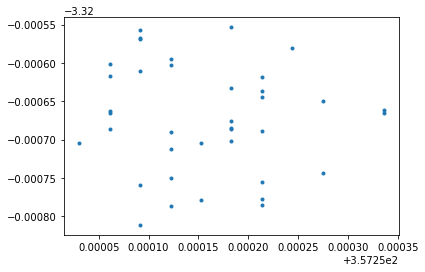

In [7]:
plt.plot(HCglonOGLE, HCglatOGLE, '.')
plt.show()

cm = plt.cm.get_cmap('viridis')
HCradius = np.sqrt(HCxOGLE**2 + HCyOGLE**2 + HCzOGLE**2)
HCcoords = coord.SkyCoord(x=HCxOGLE, y=HCyOGLE, z=HCzOGLE, unit='kpc', representation='cartesian')
panda = plt.scatter(HCcoords.galactic.l, HCcoords.galactic.b, c = HCradius, cmap = cm)
plt.colorbar(panda)
plt.ylim(-61.9016, -61.901)
plt.xlim(88.1575,88.159)
plt.show()

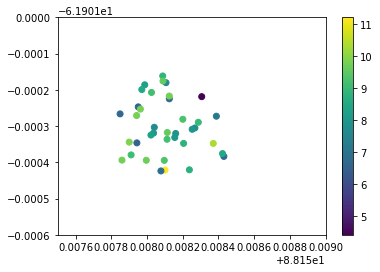

In [8]:
cm = plt.cm.get_cmap('viridis')
HCradius = np.sqrt(HCxOGLE**2 + HCyOGLE**2 + HCzOGLE**2)
HCcoords = coord.SkyCoord(x=HCxOGLE, y=HCyOGLE, z=HCzOGLE, unit='kpc', representation='cartesian')
panda = plt.scatter(HCcoords.galactic.l, HCcoords.galactic.b, c = HCradius, cmap = cm)
plt.colorbar(panda)
plt.ylim(-61.9016, -61.901)
plt.xlim(88.1575,88.159)
plt.show()

THINGS TO THINK ABOUT:

Do axis ranges even make sense?

Why don't l and b from Galaxia vs l and b that astropy calculated match?

In [5]:
#http://gala-astro.readthedocs.io/en/latest/coordinates/

#input in galactocentric coordinates
panda = coord.Galactocentric(x=GCxOGLE, y=GCyOGLE, z=GCzOGLE, v_x=GCxvelOGLE, v_y=GCyvelOGLE, v_z=GCzvelOGLE, galcen_distance = sunpos[0], z_sun = sunpos[2], galcen_v_sun = sunvel)

#go back to galactic/heliocentric coordinates
galactic = panda.transform_to(coord.Galactic)

#get proper motions in l and b
#l and b are given in degrees
#pm_l_cosb and pm_b are given in mas/year
propermotionlcosb = np.array(galactic.pm_l_cosb)
propermotionb = np.array(galactic.pm_b)
propermotionl = propermotionlcosb/np.cos(np.pi * propermotionb / 180)

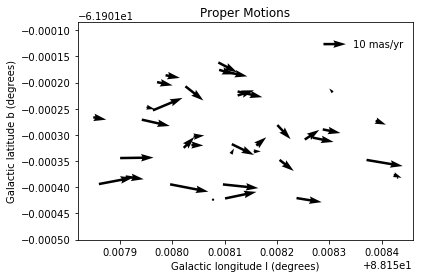

In [6]:
Q = plt.quiver(HCcoords.galactic.l, HCcoords.galactic.b, propermotionl, propermotionb)
qk = plt.quiverkey(Q, 0.8, 0.9, 10, r'10 mas/yr', labelpos='E')
plt.axis('equal')
plt.xlabel("Galactic longitude l (degrees)")
plt.ylabel("Galactic latitude b (degrees)")
plt.title("Proper Motions")
#Proper Motions in 1' x 1' patch toward OGLE-2017-BLG-0019
plt.show()

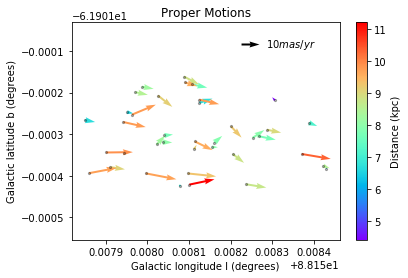

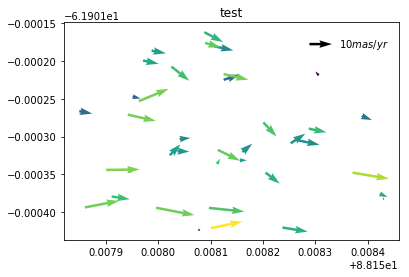

In [19]:
colors = HCradius
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow

plt.axis('equal')
plt.xlabel("Galactic longitude l (degrees)")
plt.ylabel("Galactic latitude b (degrees)")
plt.title("Proper Motions")
Q = plt.quiver(HCcoords.galactic.l, HCcoords.galactic.b, propermotionl, propermotionb, color = colormap(norm(colors)))#, units='x', pivot='tip', width=0.022, scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.7, 0.9, 10, r'$10 mas/yr$', labelpos='E', color='k')
plt.scatter(HCcoords.galactic.l, HCcoords.galactic.b, color='k', alpha = 0.3, s=5)
norm = Normalize(vmin = np.amin(HCradius), vmax = np.amax(HCradius))
sm = cm.ScalarMappable(cmap = colormap, norm = norm)
sm.set_array([])
plt.colorbar(sm).set_label('Distance (kpc)')
plt.show()
#need to figure out how to get the units right.

plt.title("test")
C = HCradius
Q = plt.quiver(HCcoords.galactic.l, HCcoords.galactic.b, propermotionl, propermotionb, C)#, units='x', pivot='tip', width=0.022, scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.8, 0.9, 10, r'$10 mas/yr$', labelpos='E')#, coordinates='figure')
#plt.scatter(HCcoords.galactic.l, HCcoords.galactic.b, color='k', s=5)
plt.show()